# Revisitando Python Cientifico

<img src="https://cdn.lynda.com/course/550457/550457-637286206187260688-16x9.jpg" alt="pyscience_intro" style="width:700px;height:320px;">

Fuente: [Lynda.com](https://www.lynda.com/Python-tutorials/Data-Science-Foundations-Python-Scientific-Stack/550457-2.html)

Una de las razones por las que Python es uno de los lenguajes de mayor crecimiento en la actualidad son las librerías que lo acompañan. Al ser un proyecto de código abierto, se han ido agregando librerías que potencian las capacidades especiales al lenguaje de programación. Este es el caso de las librerías NumPy, SciPy, SymPi, Matplotlib, Seaborn, Pandas y SciKitLearn, entre las principales que están consideradas como las herramientas básicas del muy actual y dinámico campo de las Ciencias de Datos (Data Science).

Vamos a revisar algunos elementos de estas herramientas asi como sus aplicaciones en las ciencias e ingeniería.

<div style="text-align: right"> Luis A. Muñoz </div>

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Aplicación: ingeniería hidráulica

Para suministrar un fluido en el punto D, una nueva tubería CD con un diametro de $d_2$ se conecta a una tubo existente con un diametro $d_1$ en el punto C entre los puntos A y B. La resistencia, R, al flujo en la ruta de ACD esta dado por:

$$ R = \frac{L_1-L_2 cot(\theta)}{r_1^4} K + \frac{L_2}{r_2^4 sen(\theta)} K $$

donde $K$ es una constante. Determine la ubicación del punto C (la distancia *s*) que minimiza la resistencia al flujo R. Defina un vector $\theta$ con elementos en el rango 30° a 85° en tramos de 0.5°. Calcule *R/K* para cada valor de $\theta$, muestre un gráfico de *R/K* versún $\theta$ y localice la resistencia mínima. Obtenga el resultado numérico de este valor y utilice esto para hallar la distancia *s*.

![](tuberia.png)

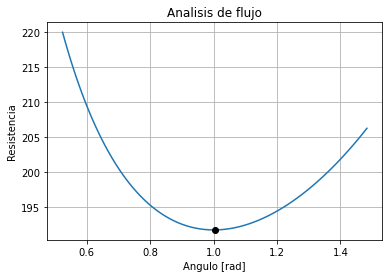

Angulo minimo: 1.0036 rad (57.5°)
Distancia del punto C (respecto a B): 25.4828 pies
Distancia del punto C (respecto a A): 24.5172 pies


In [2]:
# Cálculo numérico
d1, d2 = 1.75, 1.5
L1, L2 = 50, 40
r1, r2 = d1/2, d2/2
theta = np.deg2rad(np.arange(30, 85.5, 0.5))

R_K = (L1 - L2 * np.tan(theta)**-1)/(r1**4) + L2/(r2**4 * np.sin(theta))

rk_min = np.min(R_K)
idx_min = np.argmin(R_K)
ang_min = theta[idx_min]

# Gráfica
plt.plot(theta, R_K)
plt.title("Analisis de flujo")
plt.xlabel("Angulo [rad]")
plt.ylabel("Resistencia")
plt.plot(ang_min, rk_min, 'ko')
plt.grid()
plt.show()

# Impresion de resultados
print(f"Angulo minimo: {ang_min:.4f} rad ({np.rad2deg(ang_min):.1f}°)")
s = L2 / np.tan(ang_min)
print(f"Distancia del punto C (respecto a B): {s:.4f} pies")
print(f"Distancia del punto C (respecto a A): {L1-s:.4f} pies")

## Aplicación: cálculo numérico
La conjetura de Goldbach es uno de los problemas abiertos más famoso de las matemáticas. Establece que todo número par mayor que 2 puede ser expresado como las suma de dos números primos. Aunque la afirmación no esta demostrada (y por eso es una conjetura), se han confirmado utilizando computaodras que esto es válido hasta un número de 18 cifras.

Utilizando la conjetura, se puede definir la función G(n), donde n es el número del que se quiere verificar la conjetura y G(n) es el número de combinaciones donde esta se cumple. Por ejemplo, para n = 12, se tiene que 12 = 5 + 7, por lo que G(12) = 1. Sin embargo, para 14 se tiene que 14 = 3 + 11 y 7 + 7, por lo que G(14) = 2.

Vamos a calcular G(n) para n hasta 10,000 para luego gráficar G(n) versus n (y vamos a incluír la barra de progreso en Jupyter de la librería `tqdm`, la función `notebook.tqdm()`.

**Pruebe este ejemplo en Jupyter Notebook por el soporte de widgets**.

In [3]:
from tqdm import tqdm, notebook

primos = []

def es_primo(n):
    global primos
    if n in primos: return True
    if n < 2: return False
    if n == 2: return True
    if n % 2 == 0: return False    
    div = np.arange(3, n//2 + 1, 2)
    
    if all(n % div):
        primos.append(n)
        return True


# Calculo de los resultaddos de la función G(n)
rango = list(range(4, 20002, 2))
G = np.empty(len(rango))
idx = 0

for n in notebook.tqdm(rango):
    cont = 0
    for p in range(2, n//2):
        if es_primo(p) and es_primo(n-p):
            cont += 1
    else:
        G[idx] = cont
        idx += 1

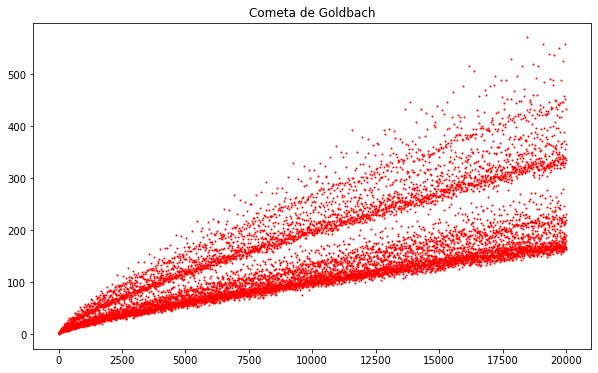

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(rango, G, 'o', color='r', markersize=1)
plt.title("Cometa de Goldbach")
plt.show()

## Aplicación: ingeniería eléctrica
En un circuito RLC serie con una fuente de voltaje AC, la amplitud de la corriente I esta dada por:

$$I =\frac{v_m}{\sqrt{R^2+ (\omega_dL - 1/(\omega_dC))^2}}$$

donde $\omega_d = 2 \pi f_d$, en el que $fd$ es la frecuencia de la fuente; R, C y L son la resistencia, la capacitancia y la inductancia, respectivamente; y $v_m$ es la amplitud de V. Para el circuito se tienen los siguientes valores:

R = 80 ohm, C = 18 uF, L = 260 mH y $v_m$ = 10 V

Muestre un gráfico de *I* en función de $f_d$ para $10 \le f \le 10000 Hz$. Use escala lineal para I y escala logarítmica para $f_d$

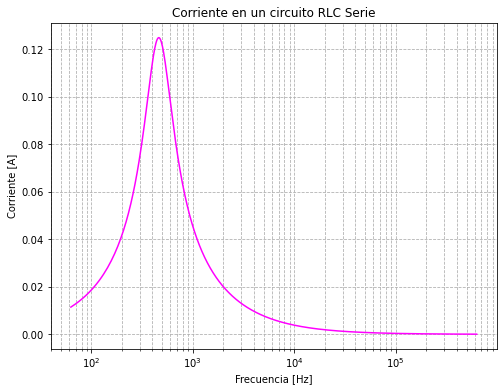

In [5]:
import numpy as np
import matplotlib.pyplot as plt

R = 80
C = 18e-6
L = 260e-3
vm = 10

fd = np.arange(10, 100000)
wd = 2 * np.pi * fd

I = vm / np.sqrt(R**2 + (wd * L - 1/(wd * C))**2)

plt.figure(figsize=(8, 6))
plt.semilogx(wd, I, color='magenta')
plt.title("Corriente en un circuito RLC Serie")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Corriente [A]")
plt.grid(linestyle='dashed', which='both')
plt.show()

## Uso de matplotlib con objetos graficos (fig, ax)
![](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

Cuando se llama a las instrucciones graficas, como `plt.title()` lo que realmente sucede tras la cortina es la inspección del gráfico (llamado _axes_) para llamar a un setter llamado `set_title`. Esta es la forma de interactuar con la librería gráfica directamente con los objetos gráficos. Esto suele ser más complejo, pero se tiene un control más fino de las propiedades de un gráfico

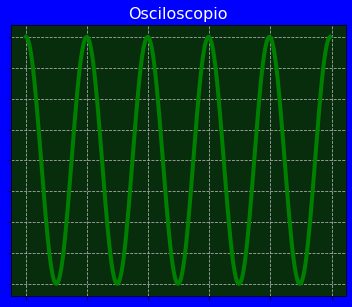

In [6]:
f = 5
t = np.linspace(0, 1, f * 50)
y = np.cos(2 * np.pi * f * t)

fig, ax = plt.subplots(figsize=(6, 5))  # Retorna una Figura y Un Axis
fig.set_facecolor('blue')

ax.plot(y, color='green', linewidth=4)
ax.set_title("Osciloscopio", color='white', fontsize=16)
ax.set_facecolor('#072d0d')
ax.set_xticklabels([""])
ax.set_yticklabels([""])
ax.grid(True, linestyle='--')

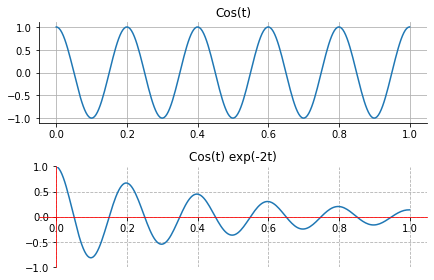

In [7]:
f = 5
t = np.linspace(0, 1, f * 50)
y1 = np.cos(2 * np.pi * f * t)
y2 = y1 * np.exp(-2 * t)

# Retorna una Figura y dos axis
fig, (ax1, ax2) = plt.subplots(figsize=(6, 4), nrows=2, ncols=1)

line1, = ax1.plot(t, y1); ax1.set_title("Cos(t)"); ax1.grid()
line2, = ax2.plot(t, y2); ax2.set_title("Cos(t) exp(-2t)"); ax2.grid(linestyle='dashed')

# Control de los ejes coordenados (spines)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position(('data', 0))
ax2.spines['left'].set_position(('data', 0))
ax2.spines['bottom'].set_color('red')
ax2.spines['left'].set_color('red')

ax2.set_ylim(-1, 1)

plt.tight_layout()
plt.show()

## Aplicación: Procesamiento Digital de Señales
Se quiere generar un tono senoidal de 440Hz de 3 segundos de duración, utilizando una tasa de muestreo de 8kHz (número de muestras por segundo).

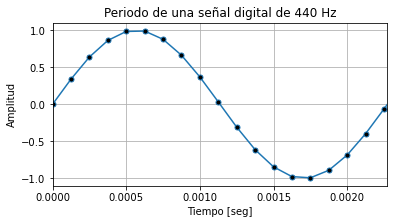

In [8]:
ff = 440      # frecuencia de la señal
fm = 8000     # muestras por segundo
tm = 1 / fm   # Periodo de muestreo
t = 3        # Duracion de la señal a muestrear

#t_vec = np.linspace(0, t, t * fm)
t_vec = np.arange(0, t, tm)
y = np.sin(2 * np.pi * ff * t_vec).astype(np.float32)

fig, ax = plt.subplots(1, figsize=(6, 3))
ax.plot(t_vec, y, '-o', markerfacecolor='k', markersize=5)
ax.set_xlim(0, 1/ff)
plt.title(f"Periodo de una señal digital de {ff} Hz")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo [seg]")
plt.grid()
plt.show()

Para reproducir la muestra generada es necesario instalar pyAudio:

    conda install -c anaconda pyaudio

In [ ]:
# Se reproduce la señal digital
def play_audio(audio_sample, rate=44100):
    import pyaudio

    p = pyaudio.PyAudio()

    stream = p.open(format=pyaudio.paFloat32, channels=1, rate=rate, output=True)
    stream.write(audio_sample.tostring())
    stream.close()
    p.terminate()

In [ ]:
play_audio(y, rate=8000)

## Ejemplo de aplicación: Generación de tonos DTMF
![](https://elastixtech.com/wp-content/uploads/2013/01/Elastix-DTMF_02.gif?x84371)

In [ ]:
def tone(freq, sample_rate=44100, time_dur=1, amplitude=1):
    t_vec = np.arange(0, time_dur, 1/sample_rate)
    return amplitude * np.sin(2 * np.pi * freq * t_vec).astype(np.float32)
    
def dtmf_tone(number, rate, time_dur):
        dtmf_freqs = {'1': (1209, 697), '2': (1336, 697), '3': (1477, 697), 
                      '4': (1209, 770), '5': (1336, 770), '6': (1477, 770), 
                      '7': (1209, 852), '8': (1336, 852), '9': (1477, 852), 
                      '*': (1209, 941), '0': (1336, 941), '#': (1477, 941),}
        
        if dtmf_freqs.get(number, False):
            freq1, freq2 = dtmf_freqs[number]
            return (tone(freq1, rate, time_dur) + tone(freq2, rate, time_dur)) / 2

def send_dtmf(number):
    from time import sleep
    
    for digit in number:
        if digit == ',':
            sleep(1)
        else:
            tone = dtmf_tone(digit, rate=8000, time_dur=0.5)
            play_audio(tone, rate=8000)

In [ ]:
send_dtmf('0800')

## Generación de notas musicales
Las notas musicales tienen una relación matemática de proporcionalidad respecto a una nota de referencia. Por convención la nota de afinación es la nota LA (440 Hz) de sistema latino o A5 del sistema americano. En función de esta notas, las frecuencias de las demás notas están definidas por:

$$ F_n = F_{LA} (\sqrt[12]{2})^d  $$

donde $d$ es la distancia en semitonos respecto a la nota de afinación. Por ejemplo, la nota C de la siguiente escala (a la derecha) sera:

$$ C5 = 440 * (\sqrt[12]{2})^2 = 523.25 $$

Es decir, lo que se requiere saber es cuantas posiciones se encuentra desplazada una nota en el teclado respecto a la nota de afinación (positivo a la derecha, negativo a la izquierda).

![](https://2.bp.blogspot.com/-0GhX4W7k11k/ULy3bipyBII/AAAAAAAAAAc/mOVXaU7b4YM/s1600/keyboard+notes+.gif)

In [ ]:
def nota_freq(letter='A5'):
    notes = ['A0', 'A0b', 'B0', 'C0', 'C0b', 'D0', 'D0b', 'E0', 'F0', 'F0b', 'G0', 'G0b', 
             'A1', 'A1b', 'B1', 'C1', 'C1b', 'D1', 'D1b', 'E1', 'F1', 'F1b', 'G1', 'G1b', 
             'A2', 'A2b', 'B2', 'C2', 'C2b', 'D2', 'D2b', 'E2', 'F2', 'F2b', 'G2', 'G2b', 
             'A3', 'A3b', 'B3', 'C3', 'C3b', 'D3', 'D3b', 'E3', 'F3', 'F3b', 'G3', 'G3b', 
             'A4', 'A4b', 'B4', 'C4', 'C4b', 'D4', 'D4b', 'E4', 'F4', 'F4b', 'G4', 'G4b', 
             'A5', 'A5b', 'B5', 'C5', 'C5b', 'D5', 'D5b', 'E5', 'F5', 'F5b', 'G5', 'G5b', 
             'A6', 'A6b', 'B6', 'C6', 'C6b', 'D6', 'D6b', 'E6', 'F6', 'F6b', 'G6', 'G6b', 
             'A7', 'A7b', 'B7', 'C7', 'C7b', 'D7', 'D7b', 'E7', 'F7', 'F7b', 'G7', 'G7b',
             'A8', 'A8b', 'B8', 'C8', 'C8b', 'D8', 'D8b', 'E8', 'F8', 'F8b', 'G8', 'G8b']
    
    if letter in notes:
        r = notes.index(letter) - 48
        return 440 * (2 ** (1/12)) ** r
    elif letter == 'P':
        return 0
    else:
        return None

In [ ]:
# Escala musical
escala = int(input("Ingrese la escala [0-7]: "))

for letter in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    y = tone(nota_freq(letter + str(escala)), time_dur=0.5)
    play_audio(y)

In [ ]:
# Mario Sound!!!
music = [('E4', 0.25), ('E4', 0.25), ('E4', 0.35), ('C4', 0.35), 
         ('E4', 0.35), ('G4',0.35), ('P', 0.5), ('G3', 0.5)]

for music_note in music:
    letter, time = music_note
    sound = tone(nota_freq(letter), time_dur=time)
    play_audio(sound)

## Audio en tiempo real

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
from tkinter import TclError
%matplotlib tk

CHUNK = 1024                 # Buffer de 1Kb
FORMAT = pyaudio.paInt16     # 1Kb muestras de 16 bits
CHANNELS = 1                 # Audio Mono
RATE = 8000                 # Tasa de muestreo: 44100 muestras por segundo (de 16 bits)
MAX_AMPLITUDE = 2**15 - 1

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
               channels=CHANNELS,
               rate=RATE,
               input=True,
               output=False,
               frames_per_buffer=CHUNK)

fig, ax = plt.subplots(1)

# Gráfico base
x = np.arange(0, CHUNK)
line, = ax.plot(x, np.random.normal(0, 0.1, CHUNK))
ax.set_ylim(-MAX_AMPLITUDE, MAX_AMPLITUDE)
ax.set_xlim(0, CHUNK)
ax.set_title(f"Audio en tiempo real fm={RATE:,}Hz")
ax.grid()

while True:
    try:
        # Lee un CHUNK de datos
        data_in = np.frombuffer(stream.read(CHUNK), dtype=np.int16)
        
        line.set_ydata(data_in)
        fig.canvas.draw()
        fig.canvas.flush_events()
   
    except TclError:
        stream.close()
        p.terminate()
        break